# Clase 5: Aprendizaje no supervisado

A diferencia del aprendizaje supervisado, en el *análisis no supervisado* los datos no tienen etiqueta, y solo contamos con sus características $x_i$. 
Todos lucen igual y el objetivo es encontrar estructuras subyacentes en los datos: patrones, grupos, redundancias...:

<center>
<img src='im/NoSupervisado.PNG'> 
<img src='im/NoSupervisadoClas.PNG'>
</center>

Intentaremos dar respuesta a las siguientes preguntas:
- ¿Hay alguna manera informativa de visualizar los datos?
- ¿Existen subgrupos interesantes dentro de la muestra observada?
- ¿Hay datos atípicos o anomalías?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('ecommerce-customers.csv')
data.head()
#data.sample() # Muestra aleatoria de la base de datos

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Membership Category
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,Premium
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,Premium
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,Premium
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,Premium
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,Premium


#### ¿Qué tipos de datos es cada una de las variables?

In [24]:
data.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
Membership Category      object
dtype: object

In [27]:
data['Membership Category'] = data['Membership Category'].astype('category')

In [28]:
columnas = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Yearly Amount Spent']

In [29]:
import seaborn as sns

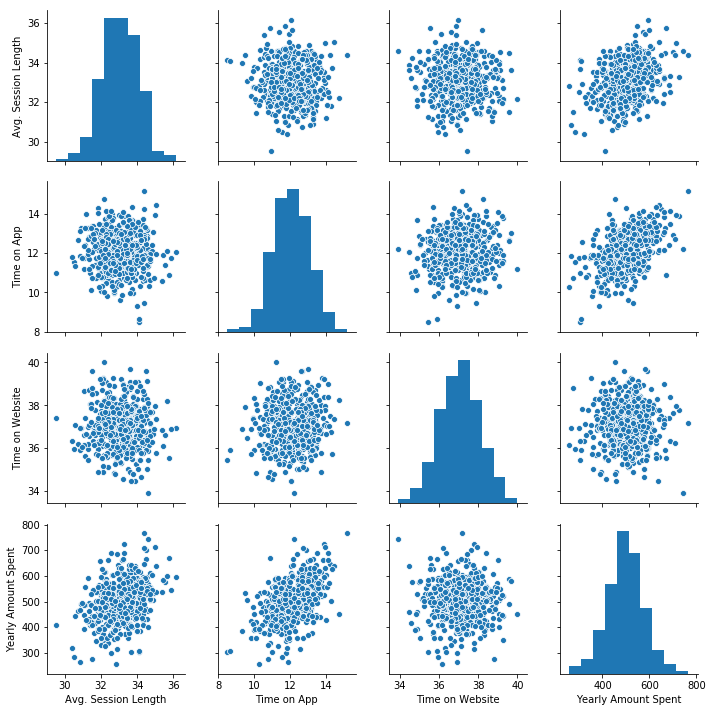

In [32]:
sns.pairplot(data.loc[:,columnas]);

## Reducción de dimensionalidad: Análisis de Componentes Principales (PCA)

- Queremos resumir la información según las direcciones de las características en las que más varían las observaciones.

- Un _Componente Principal_ $Z$ es una combinación lineal de las características de la muestra:

$$Z = \varphi_1 X_1 + \varphi_2 X_2 + ... + \varphi_k X_k.$$

Para obtener el _j_-ésimo componente principal $Z_j$ se procede de la siguiente manera manera:

$$Z_j = \varphi_{1,j} X_1 + \varphi_{2,j} X_2 + ... + \varphi_{k,j} X_k$$

$$\max_{\vec \varphi_j} \left\{ Var(Z_j) \right\} = \max_{\vec \varphi_j} \left\{ \frac{1}{N}\sum_{i=1}^{N}(\varphi_{1,j} x_{i,1} + \varphi_{2,j} x_{i,2} + ... + \varphi_{k,j} x_{k,N})^2 \right\},$$

con las restricciones 
$$\sum_{i=1}^{k}\varphi_{i,j}^2 = 1, ~~~~~ \vec\varphi_j \perp Z_1, ~\vec\varphi_j \perp Z_2, ..., ~\vec\varphi_j \perp Z_{j-1}.$$


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaled_data = data.loc[:, columnas]

([array([  1.,   7.,  25.,  76., 119., 131.,  86.,  46.,   6.,   3.]),
  array([  2.,   5.,  23.,  78., 134., 112.,  92.,  44.,   8.,   2.]),
  array([  1.,   7.,  23.,  82., 115., 132.,  88.,  38.,  13.,   1.]),
  array([  2.,   8.,  19.,  72., 126., 136.,  95.,  26.,  12.,   4.])],
 array([-3.56852718, -2.87570805, -2.18288891, -1.49006978, -0.79725065,
        -0.10443152,  0.58838762,  1.28120675,  1.97402588,  2.66684502,
         3.35966415]),
 <a list of 4 Lists of Patches objects>)

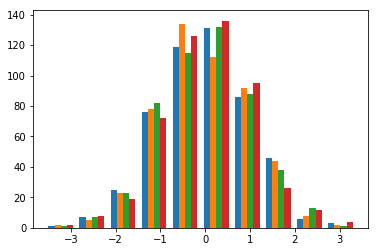

In [92]:
scaled_data = StandardScaler().fit_transform(scaled_data)
# plt.hist(scaled_data)

In [71]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA(n_components = len(columnas))

In [99]:
pc = pca.fit_transform(scaled_data)# devuelve los z

In [100]:
pc = pd.DataFrame(pc,columns = ['pc1','pc2','pc3','pc3'])

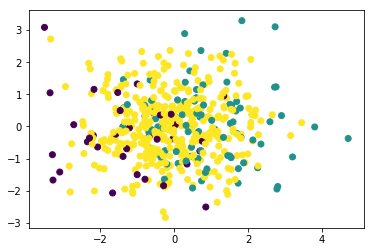

In [101]:
plt.scatter(pc['pc1'],pc['pc2'],c=data['Membership Category'].cat.codes);# .cat.codes por los valores categoricos

In [102]:
pca.components_# phis

array([[ 0.39054956,  0.58064458,  0.05368841,  0.71234855],
       [ 0.62596276, -0.43736267, -0.6427062 ,  0.0617516 ],
       [-0.53086821,  0.36719234, -0.76218683,  0.0491932 ],
       [ 0.41691799,  0.58028919, -0.05583496, -0.697371  ]])

In [75]:
pca.explained_variance_ratio_

array([0.40037223, 0.27259863, 0.23402758, 0.09300155])

In [76]:
pca.explained_variance_ratio_.cumsum()

array([0.40037223, 0.67297086, 0.90699845, 1.        ])

Los componentes principales maximizan la varianza observada de los datos y, además, generan el hiperplano más cercano a las observaciones

<center>
<img src='im/PCAajuste.PNG'> 
</center>

Esto motiva a usarlos tambien como variables predictoras en modelos de aprendizaje supervisado.

### ¿Cuántos componentes usamos?

Buscamos un codo en la gráfica: cuando la ganancia en varianza explicada no compense el usar un componente adicional (más dimensionalidad).

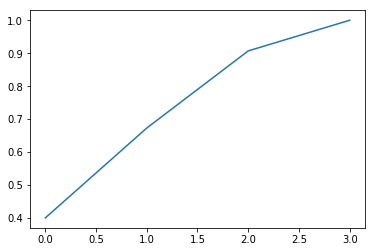

In [80]:
plt.plot(range(len(columnas)),pca.explained_variance_ratio_.cumsum());

### ¿Qué ocurre si no normalizamos las variables?

La diferencia en la escala genera que la variable de _gasto_ recoja el 99 % de la varianza y por tanto sea el primer componente principal exclusivamente.

In [87]:
pca_noscale = PCA(n_components = len(columnas))
pc_noscale = pca_noscale.fit_transform(data.loc[:,columnas])

In [89]:
pca_noscale.explained_variance_ratio_

array([9.99583080e-01, 1.74288903e-04, 1.49641131e-04, 9.29895528e-05])

In [90]:
pca_noscale.components_

array([[ 4.44393121e-03,  6.25951436e-03, -3.35898913e-05,
         9.99970534e-01],
       [ 5.00154383e-01, -4.59188418e-01, -7.34160198e-01,
         6.27002939e-04],
       [-6.43595470e-01,  3.70095308e-01, -6.69935865e-01,
         5.20989379e-04],
       [-5.79319183e-01, -8.07549551e-01,  1.10429793e-01,
         7.63325686e-03]])

#### Existen otros algoritmos de reducción de dimensionalidad:

- MCA (Variables Categoricas)
- tSNE.

# Análisis de clustering: $k$-medias

Queremos divdir la base de datos en diferentes grupos tales que las observaciones en un mismo grupo sean _similares_ entre sí, y observaciones en grupos distintos sean _diferentes_ entre ellas.

**¿Cómo definimos dos datos como similares o diferentes?**


- El método de agrupamiento de $k$-medias busca dividir el conjunto de datos en $k$ grupos diferentes que no se sobrelapan.
- Cada una de las observaciones $x_i$ pertenece a uno, y solo uno, de los clusters $C_k$.
- Para cada grupo, se calcula su varianza interna (_within cluster variation_):

$$Var(C_k) = \sum_{j=1}^n Var(X_j^k) = \sum_{j=1}^n\left(\sum_{x_i\in C_k}(x_{i,j}-\bar X_j^k)^2\right).$$

- Queremos que la sumas de esta varianzas de los grupos sea lo más pequeña posible, en otras palabras, que los datos dentro de cada cluster sean lo más parecidos. 

In [94]:
from sklearn.cluster import KMeans

In [96]:
kmedias = KMeans(n_clusters = 3)

In [97]:
clusters= kmedias.fit(scaled_data)

In [104]:
pc['grupo'] = clusters.predict(scaled_data)

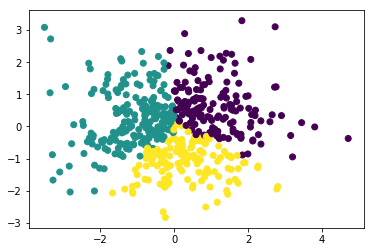

In [107]:
plt.scatter(pc['pc1'],pc['pc2'],c = pc['grupo']);

### Los centroides de cada grupo nos permiten entender qué tipo de observaciones hay un cada uno de ellos.

In [108]:
clusters.cluster_centers_ # 

array([[ 0.86174919,  0.35819415, -0.31830975,  0.8409551 ],
       [-0.24346824, -0.77320182, -0.19218005, -0.76167524],
       [-0.63759562,  0.73562264,  0.65559109,  0.15817436]])

### ¿Cuántos grupos se deben escoger?

- Información propia del problema.
- Nuevamente usamos la regla del codo: cuando la ganancia en menor varianza de los grupos no compense tener un grupo adicional.

array([219.53824639, 175.48941237, 126.26677676,  90.04671999,
        58.83342005,  49.88487197,  41.49383358,  35.6937209 ,
        41.39125809,  26.09401024,  19.01892626,  30.92462091,
        17.77899193])

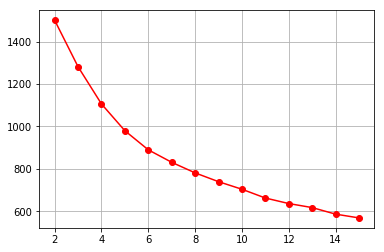

In [124]:

inertia = []
for k in range(2,16):
    kmedias = KMeans(n_clusters = k)
    clusters= kmedias.fit(scaled_data)
    inertia.append(clusters.inertia_)
    
plt.plot(np.arange(2,16),inertia,marker = 'o',color='r')
plt.grid(True)

np.abs(np.diff(inertia))

### Existen muchos otros algoritmos de agrupamiento (depende del número de variables, el tipo de las variables, etc):

- $k$-prototipos.
- Clústering jerárquico.

# Detección de anomalías: Mixturas gaussianas

La idea es construir un _Modelo_ que permita estimar $p(x)$: la probabilidad de observar las características de cada uno de los datos. 

Con este modelo, si la probabilidad de observar $x_{test}$ es menor que cierto umbral de _rareza_: $p(x_{test}) < \varepsilon$, se cataloga $x_{test}$ como una observación _anómala_. Por el contrario, si $p(x_{test}) \geq \varepsilon$, $x_{test}$ supera el umbral de _rareza_ y se cataloga como una observación normal.

El Modelo de $p(x)$ debería indicar que observaciónes en el centro ocurren con mucha frecuencia,observaciones más alejadas ocurrirán frecuentemente, observaciones aún más alejadas ocurriren con relativa frecuencia, pero observaciones muy alejadas ocurrirán rara vez:

<center>
<img src='im/model_anom.PNG'> 
</center>

Una forma natural es suponer que las distintas variables se distribuyen de manera Normal:

$$p(x_i) = \prod_{j=1}^k \frac{1}{\sqrt{2\pi}\sigma_j}*\exp(-\frac{(x_{i,j}-\mu_j)}{2\sigma_j^2}),$$

con 

$$\mu_j = \frac{1}{N}\sum_{i=1}^N x_{i,j}, ~~~~ \sigma^2_j = \frac{1}{N} \sum_{i=1}^N (x_{i,j}-\mu_j)^2.$$


In [126]:
test_data = data.loc[:, ['Time on Website', 'Yearly Amount Spent']]

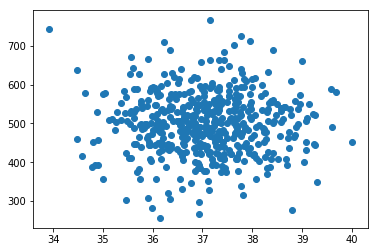

In [127]:
plt.scatter(test_data['Time on Website'], test_data['Yearly Amount Spent']);

In [128]:
test_data['prob'] = ((1/((2*np.pi)**(1/2)*test_data['Time on Website'].std()))*np.exp(-(test_data['Time on Website']-test_data['Time on Website'].mean())**2/(2*test_data['Time on Website'].var()))*
                     (1/((2*np.pi)**(1/2)*test_data['Yearly Amount Spent'].std()))*np.exp(-(test_data['Yearly Amount Spent']-test_data['Yearly Amount Spent'].mean())**2/(2*test_data['Yearly Amount Spent'].var())))

In [129]:
test_data.describe()

,Time on Website,Yearly Amount Spent,prob
count,500.000000,500.000000,5.000000e+02
mean,37.060445,499.314038,1.013049e-03
std,1.010489,79.314782,5.801086e-04
min,33.913847,256.670582,1.324214e-07
25%,36.349257,445.038277,5.417329e-04
50%,37.069367,498.887875,1.019011e-03
75%,37.716432,549.313828,1.531008e-03
max,40.005182,765.518462,1.979607e-03


In [139]:
umbral_rareza = 0.00005

In [140]:
test_data['anomalia'] = test_data['prob'] < umbral_rareza

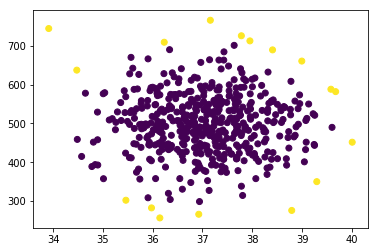

In [141]:
plt.scatter(test_data['Time on Website'], test_data['Yearly Amount Spent'],c = test_data['anomalia']);

### Ahora usando _sklearn_ (ret)

In [142]:
from sklearn.mixture import GaussianMixture

In [143]:
gmm = GaussianMixture(covariance_type='full')

In [144]:
test_data2 = data.loc[:, ['Time on Website', 'Yearly Amount Spent']]

In [146]:
gmm = gmm.fit(test_data2)

In [149]:
test_data2['prob_fancy'] = np.log(-gmm.score_samples(test_data2))

In [150]:
test_data2['prob_fancy'].describe()

count    500.000000
mean       1.967454
std        0.131867
min        1.828229
25%        1.868808
50%        1.929728
75%        2.018049
max        2.761854
Name: prob_fancy, dtype: float64

In [151]:
umbral_rareza = 2.3

In [152]:
test_data2['anomalia'] = test_data2['prob_fancy'] > umbral_rareza

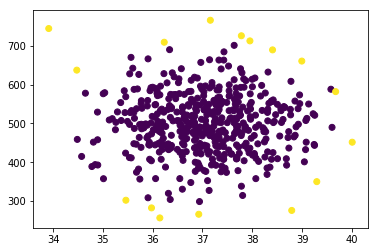

In [154]:
plt.scatter(test_data['Time on Website'], test_data['Yearly Amount Spent'],c = test_data2['anomalia']);

#### Se puden eliminar algunos supuestos:

- Otras distribuciones de probabilidad.
- No independencia de las variables.

#### O usar otras metodologías:

- Isolation Forest.
- One Class SVM.